# EDA

In [7]:
!pip install pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [11]:
# Step 3: Load the CSV file
df = pd.read_csv('co2_emissions_from_agri.csv')

In [12]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland           ...            Manure Management  \
0         63.11

In [13]:
# Display basic information about the dataframe
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
Area                               6965 non-null object
Year                               6965 non-null int64
Savanna fires                      6934 non-null float64
Forest fires                       6872 non-null float64
Crop Residues                      5576 non-null float64
Rice Cultivation                   6965 non-null float64
Drained organic soils (CO2)        6965 non-null float64
Pesticides Manufacturing           6965 non-null float64
Food Transport                     6965 non-null float64
Forestland                         6472 non-null float64
Net Forest conversion              6472 non-null float64
Food Household Consumption         6492 non-null float64
Food Retail                        6965 non-null float64
On-farm Electricity Use            6965 non-null float64
Food Packaging                     6965 non-null float64
Agr

In [14]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
              Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400          

In [15]:
# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm 

## 3. Correlation Analysis
We calculate and visualize the correlation matrix to identify relationships between different sources of CO2 emissions

In [16]:
# Display the correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                                     Year  Savanna fires  Forest fires  \
Year                             1.000000      -0.011911     -0.008902   
Savanna fires                   -0.011911       1.000000      0.507098   
Forest fires                    -0.008902       0.507098      1.000000   
Crop Residues                    0.031410       0.026309      0.075935   
Rice Cultivation                 0.001641      -0.030414      0.070997   
Drained organic soils (CO2)      0.004470       0.016874      0.107947   
Pesticides Manufacturing         0.023444       0.060794      0.052947   
Food Transport                   0.060122       0.070335      0.071083   
Forestland                       0.003590      -0.058412     -0.150876   
Net Forest conversion           -0.023792       0.226274      0.420323   
Food Household Consumption       0.056409       0.002361      0.019466   
Food Retail                      0.093201       0.015488      0.028518   
On-farm Electrici

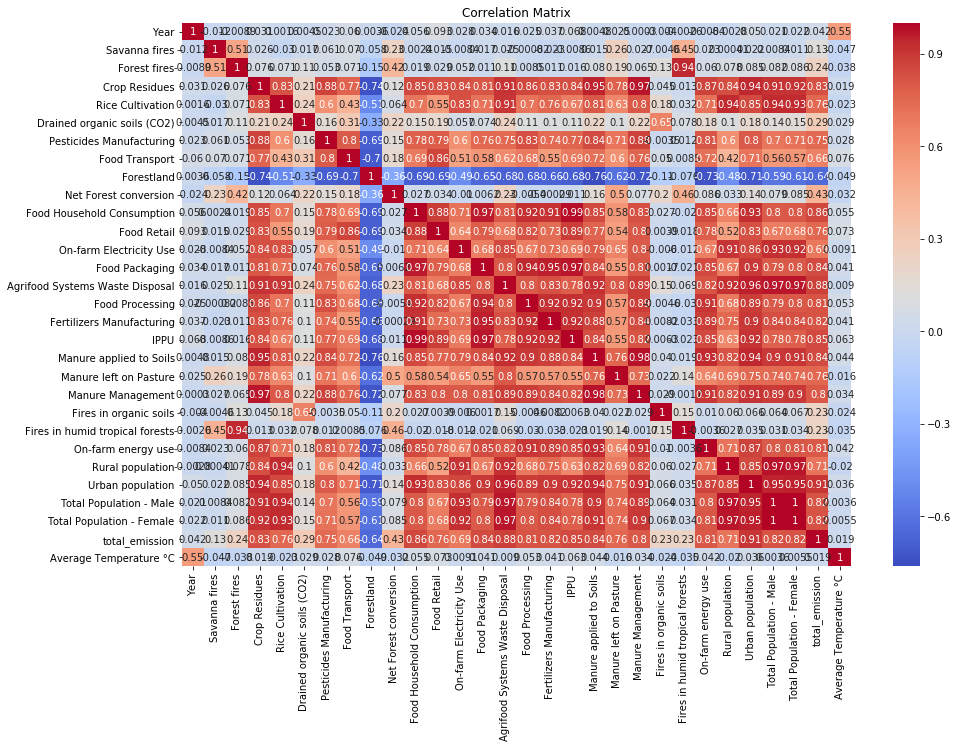

In [17]:
# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4. Visualizing CO2 Emissions Trends
### A. 
CO2 Emissions from Different Sources Over the Years for a Specific Country
We plot the CO2 emissions from different sources over the years for a specific country

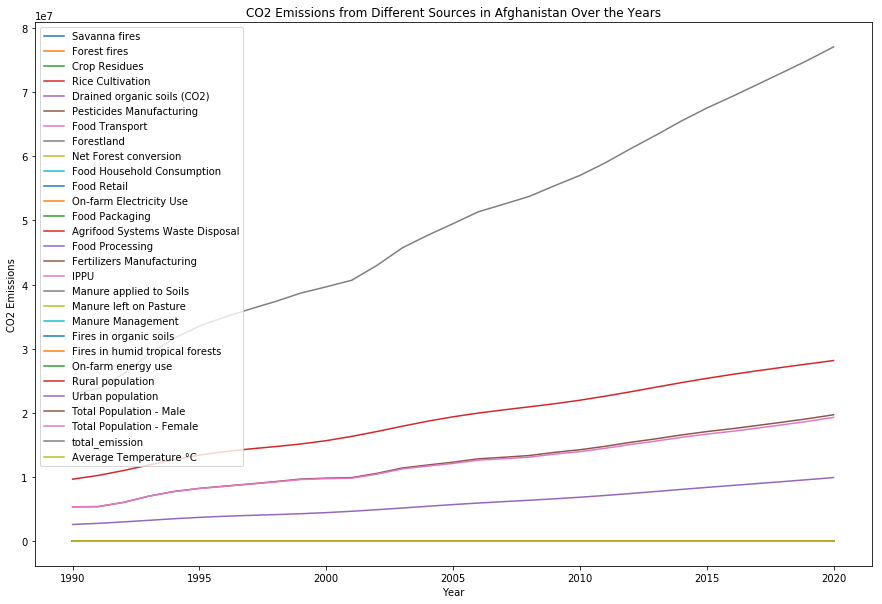

In [31]:
country = 'Afghanistan'
country_data = df[df['Area'] == country]

plt.figure(figsize=(15, 10))
for column in country_data.columns[2:]:
    plt.plot(country_data['Year'], country_data[column], label=column)

plt.title(f'CO2 Emissions from Different Sources in {country} Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

### B. 
Total CO2 Emissions Over the Years for All Countries
We calculate the total CO2 emissions for each year and plot the trends for all countries:

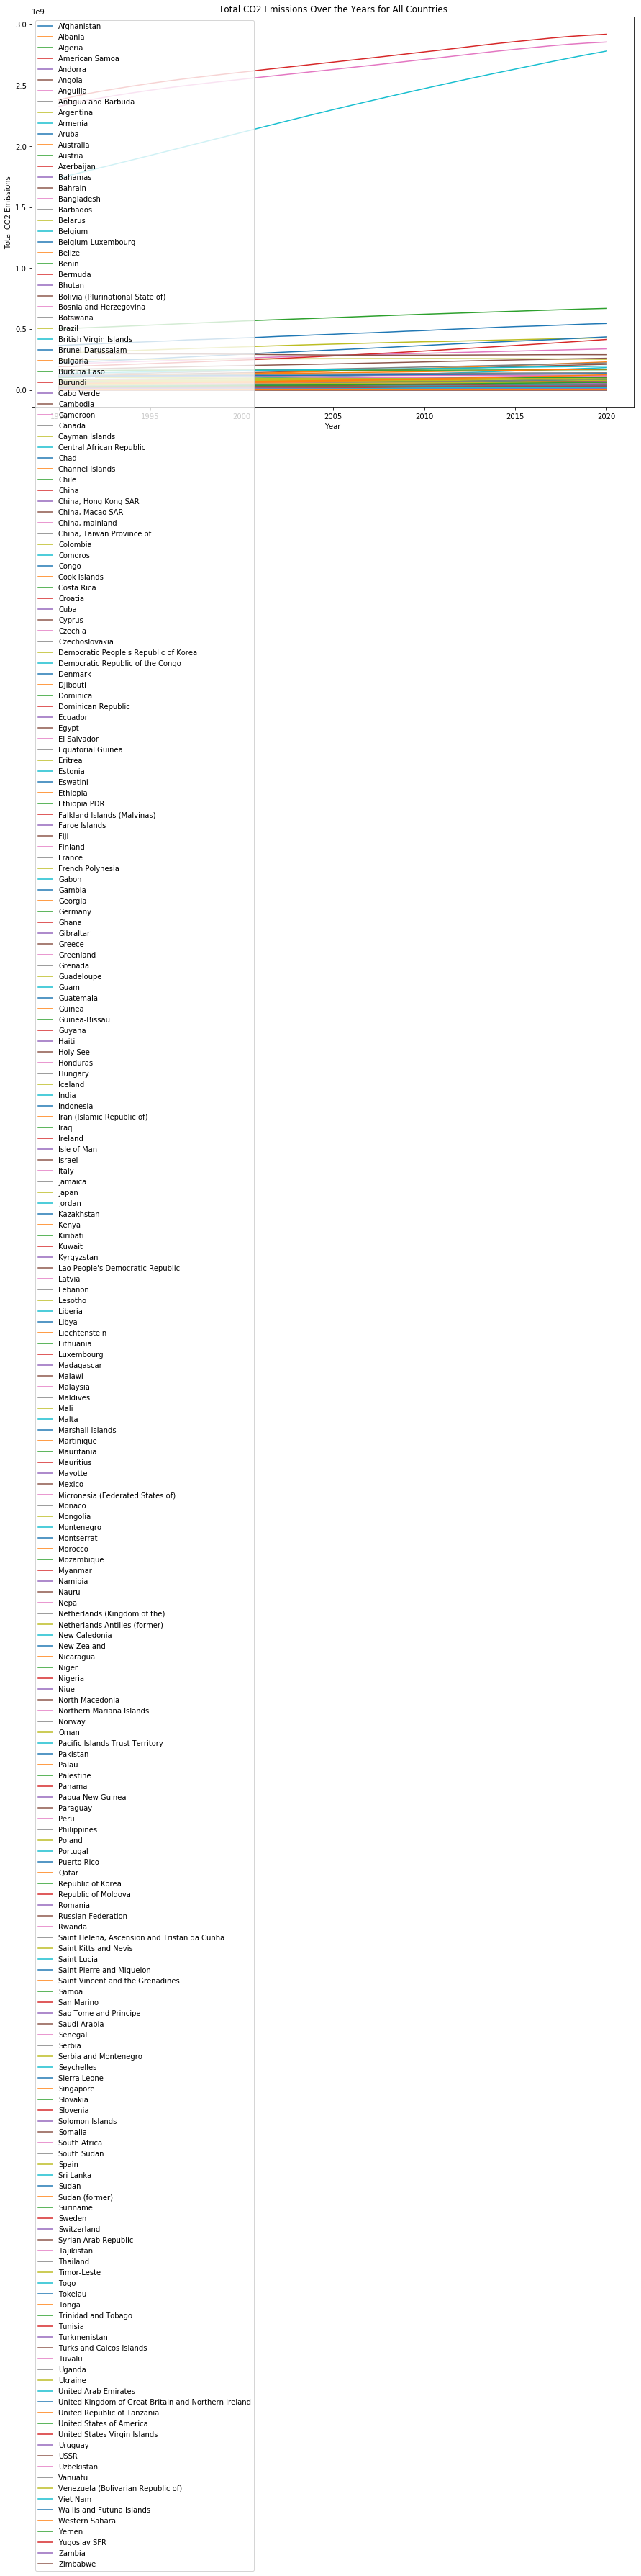

In [19]:
df['total_emission'] = df.iloc[:, 2:].sum(axis=1)

plt.figure(figsize=(15, 10))
for country in df['Area'].unique():
    country_data = df[df['Area'] == country]
    plt.plot(country_data['Year'], country_data['total_emission'], label=country)

plt.title('Total CO2 Emissions Over the Years for All Countries')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.legend()
plt.show()

### C. 
Analyzing Trends in CO2 Emissions from Specific Sources
We analyze trends in CO2 emissions from specific sources (e.g., Savanna fires, Forest fires):

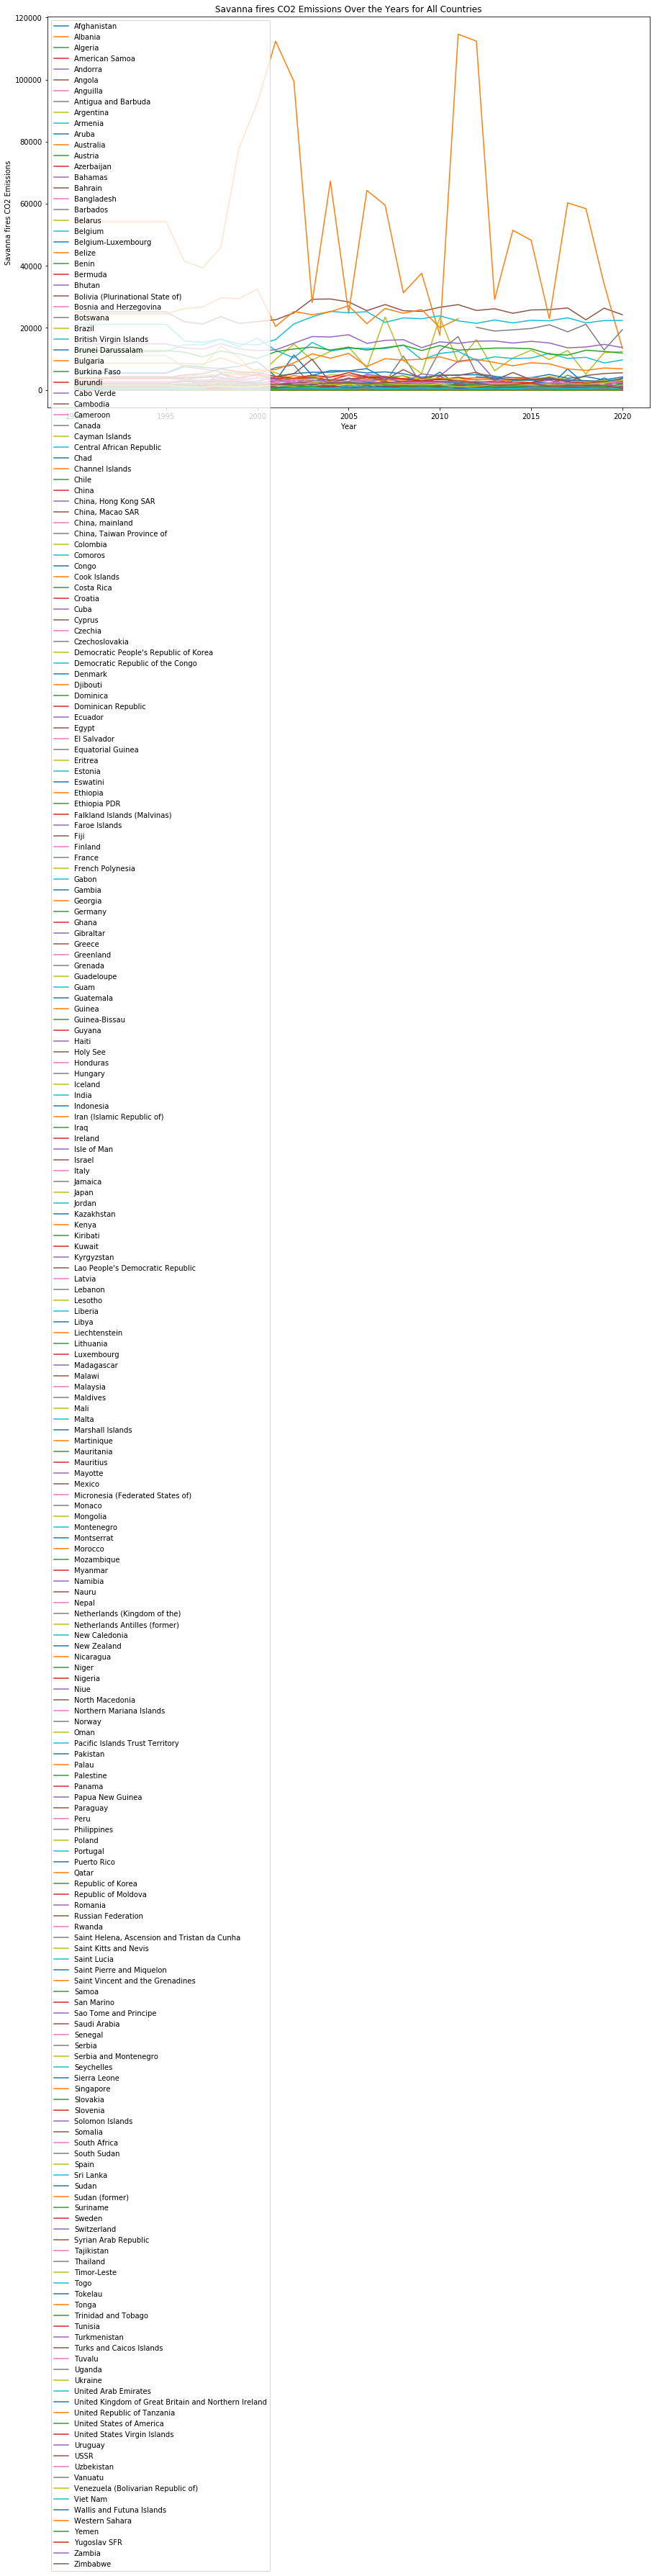

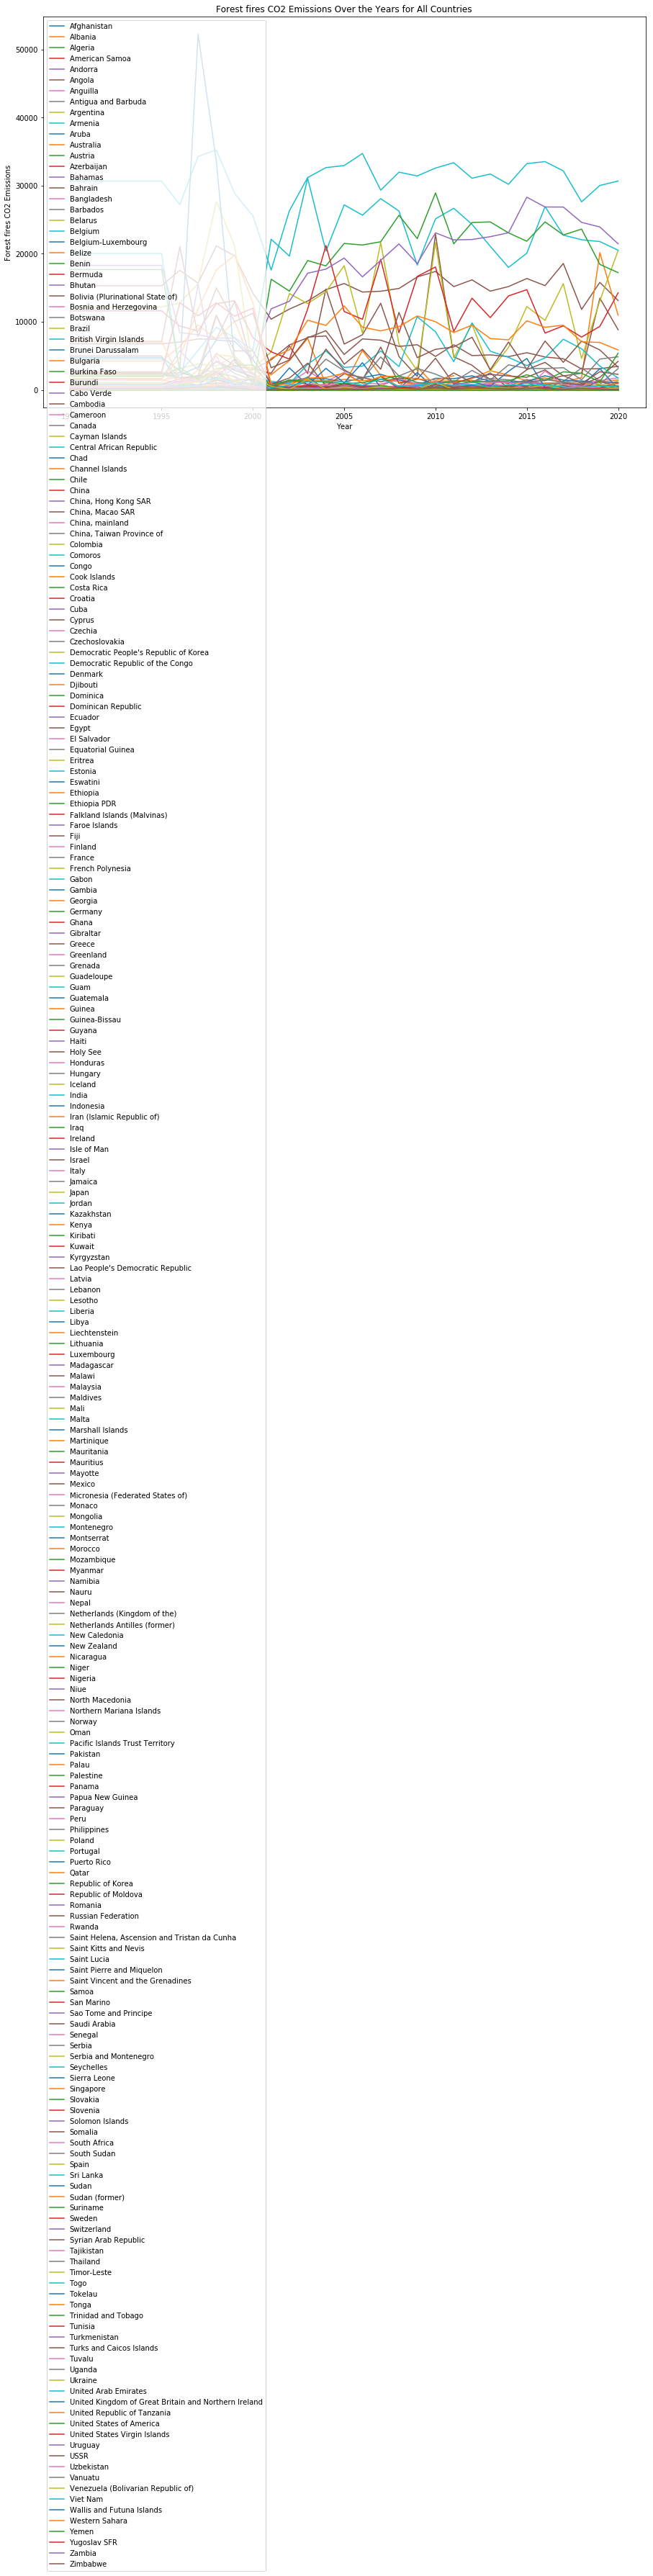

In [21]:
sources = ['Savanna fires', 'Forest fires']
for source in sources:
    plt.figure(figsize=(15, 10))
    for country in df['Area'].unique():
        country_data = df[df['Area'] == country]
        plt.plot(country_data['Year'], country_data[source], label=country)
    
    plt.title(f'{source} CO2 Emissions Over the Years for All Countries')
    plt.xlabel('Year')
    plt.ylabel(f'{source} CO2 Emissions')
    plt.legend()
    plt.show()

### Yearly Trends in CO2 Emissions
We can analyze the yearly trends in CO2 emissions for all countries combined to see how emissions have changed over time

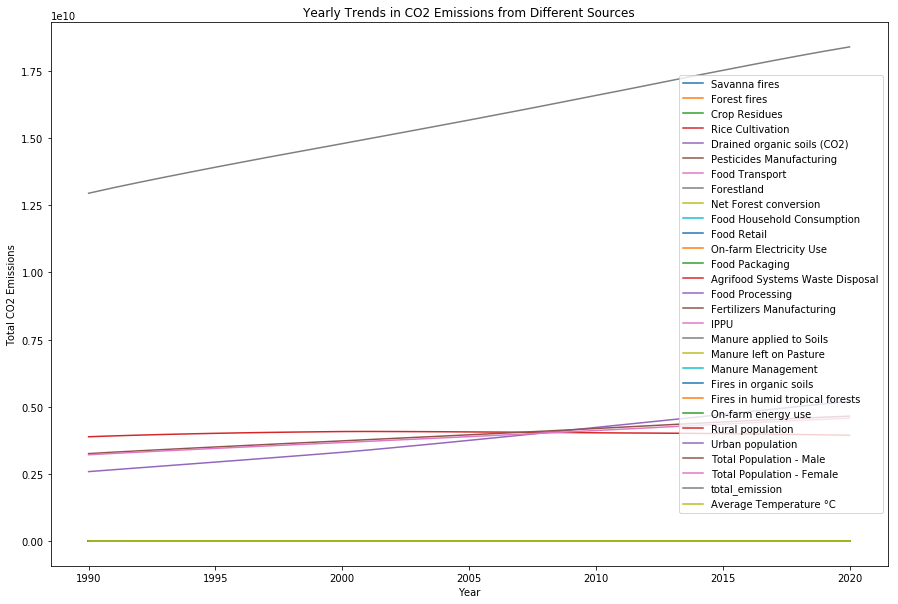

In [26]:
# Grouping the data by year and summing the emissions
yearly_data = df.groupby('Year').sum().reset_index()

plt.figure(figsize=(15, 10))
for column in yearly_data.columns[1:]:
    plt.plot(yearly_data['Year'], yearly_data[column], label=column)

plt.title('Yearly Trends in CO2 Emissions from Different Sources')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.legend()
plt.show()

### Top 10 Countries by Total CO2 Emissions
We can identify the top 10 countries with the highest total CO2 emissions and visualize their contributions.

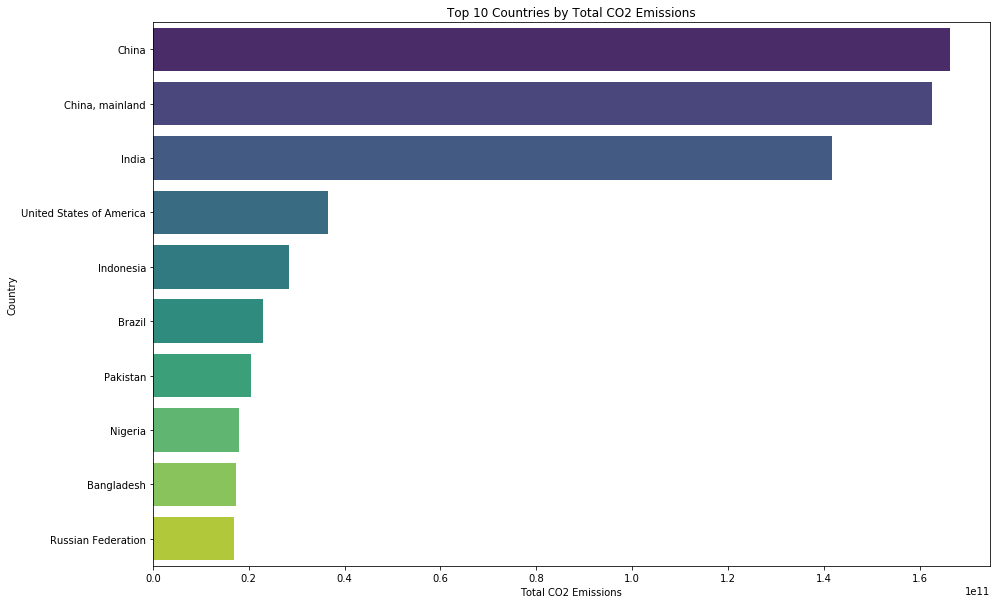

In [27]:
# Calculating total emissions for each country
country_totals = df.groupby('Area').sum().reset_index()
country_totals['total_emission'] = country_totals.iloc[:, 1:].sum(axis=1)

# Sorting the countries by total emissions and selecting the top 10
top_10_countries = country_totals.sort_values(by='total_emission', ascending=False).head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x='total_emission', y='Area', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Total CO2 Emissions')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Country')
plt.show()

## Regression Modules

In [32]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Calculate total CO2 emissions for each country
country_totals = df.groupby('Area').sum().reset_index()
country_totals['total_emission'] = country_totals.iloc[:, 1:].sum(axis=1)

# Sample data for population (in millions) for the top CO2 emitting countries
population_data = {
    'Country': ['China', 'United States', 'India', 'Russia', 'Japan'],
    'Population': [1444, 331, 1393, 146, 126]  # Population in millions
}

# Create a DataFrame for population data
population_df = pd.DataFrame(population_data)

# Merge the CO2 emissions data with population data
merged_df = country_totals.merge(population_df, left_on='Area', right_on='Country')

# Prepare the data for regression analysis
X = merged_df[['Population']]
y = merged_df['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 3.8659423310387026e+20
R-squared Value: 0.0


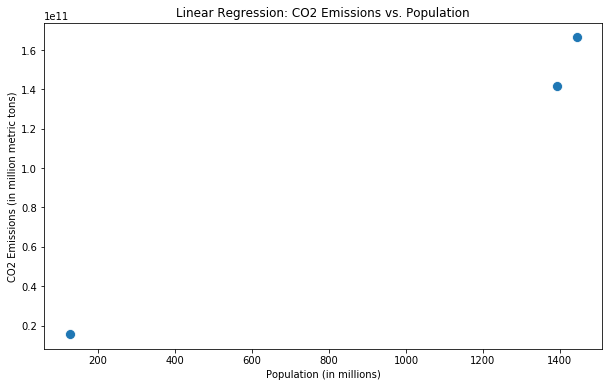

In [36]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='total_emission', data=merged_df, s=100)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: CO2 Emissions vs. Population')
plt.xlabel('Population (in millions)')
plt.ylabel('CO2 Emissions (in million metric tons)')
plt.show()